In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import scanpy as sc
from ChromaPalette.chroma_palette import *


plt.rcParams['text.color'] = 'black'
sc.set_figure_params(dpi=300, facecolor='white')
plt.style.use('ggplot')


colors = ['#17BECF', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#F4A582', '#80B1D3', '#8EBA42', '#FFB5B8', '#8491B4', '#E24A33']

In [23]:
# 创建数据框
data = {
    'dropout': ["33.67% ", "36.86%", "44.01%", "52.09%", "68.93%", "71.99%", "78.02%", "83.68%", "89.42%"],
    'DeepImpute': [0.6113, 0.591, 0.5476, 0.4831, 0.3141, 0.2813, 0.2004, 0.1258, 0.035],
    'Bis': [0.6587, 0.6475, 0.6217, 0.5903, 0.5151, 0.4959, 0.4569, 0.4145, 0.3528],
    'MAGIC': [0.6686, 0.6666, 0.6597, 0.6517, 0.6287, 0.6267, 0.6278, 0.6405, 0.6562],
    'SAVERX': [0.6832, 0.6776, 0.6638, 0.6424, 0.5969, 0.5893, 0.5724, 0.586, 0.5938],
    'scVI': [0.4866, 0.465, 0.4255, 0.4105, 0.4915, 0.5109, 0.5603, 0.567, 0.567],
    'MNNCorrect': [0.6891, 0.6796, 0.6505, 0.6147, 0.5215, 0.4999, 0.445, 0.3765, 0.2797],
    'Scanorama': [0.6566, 0.6459, 0.6239, 0.5909, 0.5369, 0.5276, 0.5175, 0.4633, 0.407],
    'scPSM': [0.5423, 0.538, 0.514, 0.4982, 0.4587, 0.4567, 0.4346, 0.3943, 0.3339],
    'SCALEX': [0.6297, 0.6337, 0.6407, 0.6475, 0.6504, 0.65, 0.6455, 0.6374, 0.6192],
    'Beaconet': [0.7209, 0.7056, 0.6816, 0.6505, 0.5923, 0.5658, 0.5287, 0.4708, 0.3881],
    'ComGRN': [0.7408, 0.7351, 0.7321, 0.7141, 0.7168, 0.7109, 0.6937, 0.6761, 0.5463],
}

# data = {
#     'dropout': ["33.67% ", "36.86%", "44.01%", "52.09%", "68.93%", "71.99%", "78.02%", "83.68%", "89.42%"],
#     'MAGIC': [0.0101, 0.0193, 0.0398, 0.0650, 0.1229, 0.1397, 0.1804, 0.2393, 0.3145],
#     'DeepImpute': [-0.0472, -0.0563, -0.0723, -0.1036, -0.1916, -0.2056, -0.2471, -0.2755, -0.3067],
#     'SAVERX': [0.0247, 0.0302, 0.0439, 0.0557, 0.0911, 0.1023, 0.1249, 0.1847, 0.2521],
#     'Bis': [0.0002, 0.0002, 0.0018, 0.0037, 0.0093, 0.0089, 0.0095, 0.0132, 0.0111],
#     'scVI': [-0.1719, -0.1823, -0.1944, -0.1762, -0.0142, 0.0239, 0.1128, 0.1657, 0.2252],
#     'SCALEX': [-0.0289, -0.0136, 0.0208, 0.0609, 0.1446, 0.1631, 0.1981, 0.2361, 0.2775],
#     'scPSM': [-0.1162, -0.1093, -0.1059, -0.0884, -0.0471, -0.0302, -0.0128, -0.0070, -0.0079],
#     'ComGRN': [0.0823, 0.0877, 0.1122, 0.1274, 0.2110, 0.2239, 0.2463, 0.2748, 0.2046]
# }

df = pd.DataFrame(data)
df = df.set_index('dropout')

print(df)

         DeepImpute     Bis   MAGIC  SAVERX    scVI  MNNCorrect  Scanorama  \
dropout                                                                      
33.67%       0.6113  0.6587  0.6686  0.6832  0.4866      0.6891     0.6566   
36.86%       0.5910  0.6475  0.6666  0.6776  0.4650      0.6796     0.6459   
44.01%       0.5476  0.6217  0.6597  0.6638  0.4255      0.6505     0.6239   
52.09%       0.4831  0.5903  0.6517  0.6424  0.4105      0.6147     0.5909   
68.93%       0.3141  0.5151  0.6287  0.5969  0.4915      0.5215     0.5369   
71.99%       0.2813  0.4959  0.6267  0.5893  0.5109      0.4999     0.5276   
78.02%       0.2004  0.4569  0.6278  0.5724  0.5603      0.4450     0.5175   
83.68%       0.1258  0.4145  0.6405  0.5860  0.5670      0.3765     0.4633   
89.42%       0.0350  0.3528  0.6562  0.5938  0.5670      0.2797     0.4070   

          scPSM  SCALEX  Beaconet  ComGRN  
dropout                                    
33.67%   0.5423  0.6297    0.7209  0.7408  
36.86%   

In [24]:
ranking = {}
ranks = df.T.rank(ascending=False, method='dense')
ranking['CellCorr'] = ranks
print("每个方法在每个数据集上的排名:")
print(ranks)

每个方法在每个数据集上的排名:
dropout     33.67%   36.86%  44.01%  52.09%  68.93%  71.99%  78.02%  83.68%  \
DeepImpute      9.0     9.0     9.0    10.0    11.0    11.0    11.0    11.0   
Bis             6.0     6.0     8.0     8.0     8.0     9.0     8.0     8.0   
MAGIC           5.0     5.0     4.0     2.0     3.0     3.0     3.0     2.0   
SAVERX          4.0     4.0     3.0     5.0     4.0     4.0     4.0     4.0   
scVI           11.0    11.0    11.0    11.0     9.0     7.0     5.0     5.0   
MNNCorrect      3.0     3.0     5.0     6.0     7.0     8.0     9.0    10.0   
Scanorama       7.0     7.0     7.0     7.0     6.0     6.0     7.0     7.0   
scPSM          10.0    10.0    10.0     9.0    10.0    10.0    10.0     9.0   
SCALEX          8.0     8.0     6.0     4.0     2.0     2.0     2.0     3.0   
Beaconet        2.0     2.0     2.0     3.0     5.0     5.0     6.0     6.0   
ComGRN          1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   

dropout     89.42%  
DeepImpute    

In [25]:
# 创建数据
data = {
    'dropout': ["33.67% ", "36.86%", "44.01%", "52.09%", "68.93%", "71.99%", "78.02%", "83.68%", "89.42%"],
    'DeepImpute': [0.0045, 0.0062, 0.0050, 0.0108, 0.0225, 0.0207, 0.0476, 0.0409, 0.0460],
    'Bis': [0.0012, 0.0012, 0.0016, 0.0022, 0.0038, 0.0046, 0.0025, 0.0045, 0.0053],
    'MAGIC': [0.0012, 0.0011, 0.0014, 0.0019, 0.0026, 0.0016, 0.0030, 0.0043, 0.0041],
    'SAVERX': [0.0024, 0.0020, 0.0040, 0.0067, 0.0073, 0.0067, 0.0202, 0.0497, 0.0580],
    'scVI': [0.0064, 0.0054, 0.0079, 0.0065, 0.0118, 0.0169, 0.0164, 0.0081, 0.0056],
    'MNNCorrect': [0.0016, 0.0018, 0.0018, 0.0028, 0.0042, 0.0038, 0.0033, 0.0096, 0.0128],
    'Scanorama': [0.0011, 0.0024, 0.0096, 0.0022, 0.0342, 0.0373, 0.0377, 0.0388, 0.0336],
    'scPSM': [0.0054, 0.0046, 0.0060, 0.0064, 0.0090, 0.0086, 0.0092, 0.0221, 0.0247],
    'SCALEX': [0.0036, 0.0023, 0.0033, 0.0042, 0.0029, 0.0043, 0.0068, 0.0087, 0.0130],
    'Beaconet': [0.0113, 0.0115, 0.015, 0.0137, 0.0081, 0.0185, 0.0165, 0.0306, 0.0399],
    'ComGRN': [0.0114, 0.0167, 0.0136, 0.0240, 0.0200, 0.0134, 0.0220, 0.0283, 0.0577],

}

# 创建数据框
vf = pd.DataFrame(data)
vf = vf.set_index('dropout')

print(vf)

         DeepImpute     Bis   MAGIC  SAVERX    scVI  MNNCorrect  Scanorama  \
dropout                                                                      
33.67%       0.0045  0.0012  0.0012  0.0024  0.0064      0.0016     0.0011   
36.86%       0.0062  0.0012  0.0011  0.0020  0.0054      0.0018     0.0024   
44.01%       0.0050  0.0016  0.0014  0.0040  0.0079      0.0018     0.0096   
52.09%       0.0108  0.0022  0.0019  0.0067  0.0065      0.0028     0.0022   
68.93%       0.0225  0.0038  0.0026  0.0073  0.0118      0.0042     0.0342   
71.99%       0.0207  0.0046  0.0016  0.0067  0.0169      0.0038     0.0373   
78.02%       0.0476  0.0025  0.0030  0.0202  0.0164      0.0033     0.0377   
83.68%       0.0409  0.0045  0.0043  0.0497  0.0081      0.0096     0.0388   
89.42%       0.0460  0.0053  0.0041  0.0580  0.0056      0.0128     0.0336   

          scPSM  SCALEX  Beaconet  ComGRN  
dropout                                    
33.67%   0.0054  0.0036    0.0113  0.0114  
36.86%   

DeepImpute
Bis
MAGIC
SAVERX
scVI
MNNCorrect
Scanorama
scPSM
SCALEX
Beaconet
ComGRN


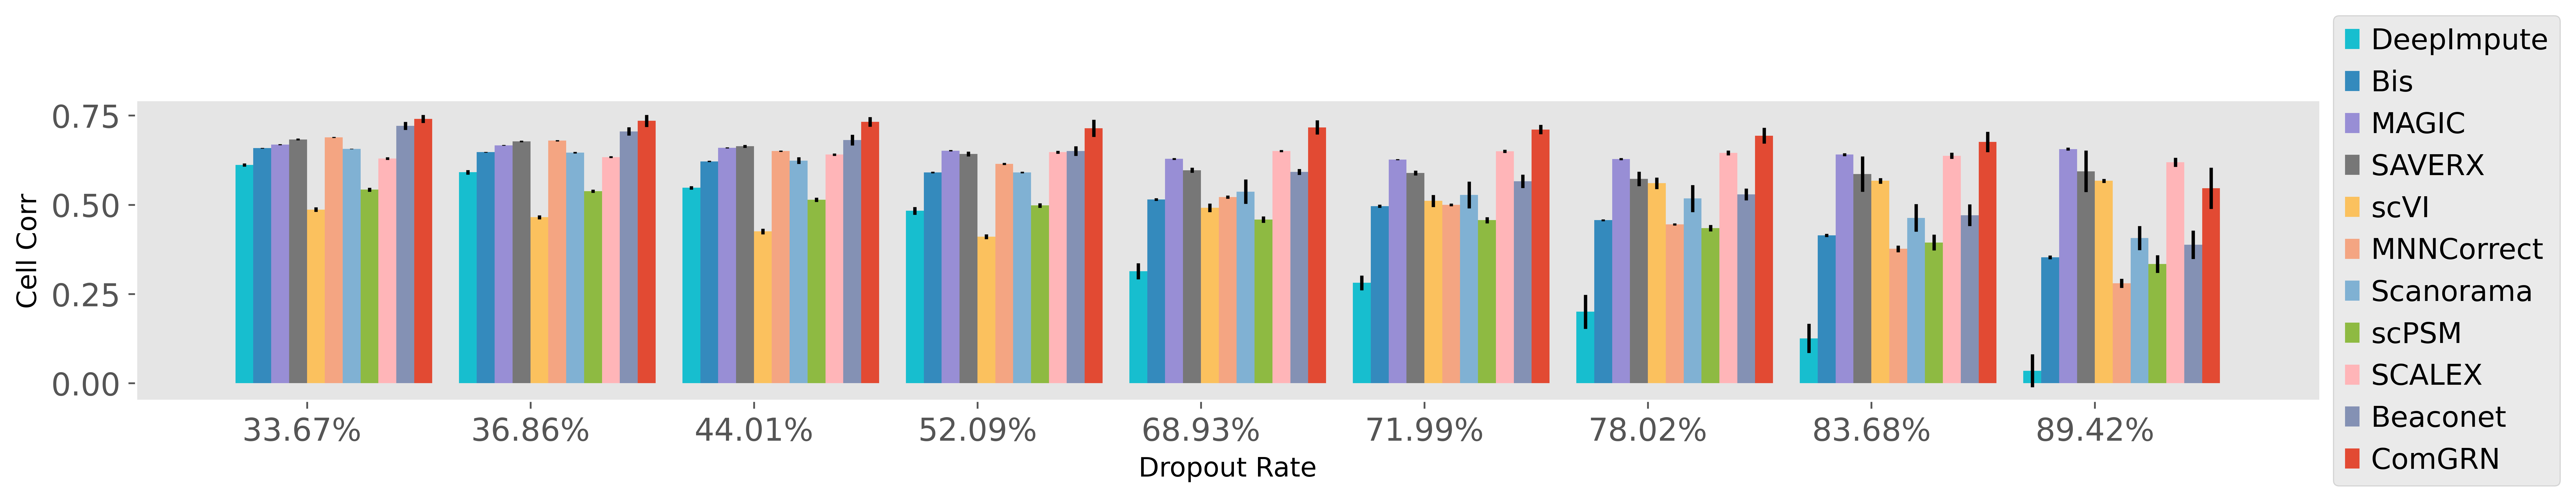

In [26]:
# 设置 Nature 配色方案
# colors = color_palette(name="Waterlilies",N=9)

# 绘制条形图
dropouts = df.index.to_list()

# Create a bar chart
fig, ax = plt.subplots(figsize=(16, 3))

# 绘制不同组的背景颜色
# for i in range(len(dropouts)):
#    plt.axvspan(i - 0.5, i + 0.5, color=colors_bg[i], alpha=0.5)


for i, label in enumerate(df.columns):
    print(label)
    ax.bar([x + (i-3.5) * 0.08 for x in range(len(dropouts))], df[label], yerr=vf[label], width=0.08, label=label, color=colors[i])
    # ax.set_xticklabels(df.index, rotation=45, ha='right')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.set_xticks(range(len(dropouts)))
ax.set_xticklabels(dropouts)
ax.set_xlabel('Dropout Rate')
# ax.set_title('Comparison of Different Methods')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Cell Corr')
plt.grid(False)
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
data = {
    'dropout': ["33.67% ", "36.86%", "44.01%", "52.09%", "68.93%", "71.99%", "78.02%", "83.68%", "89.42%"],
    'DeepImpute': [0.0936, 0.0800, 0.0597, 0.0126, -0.0919, -0.0790, -0.1093, -0.1215, -0.1453],
    'Bis': [0.0570, 0.0582, 0.0869, 0.1045, 0.1269, 0.1208, 0.1163, 0.1225, 0.1093],
    'MAGIC': [0.4378, 0.4521, 0.4676, 0.4799, 0.4934, 0.5026, 0.5249, 0.5619, 0.6034],
    'SAVERX': [0.4286, 0.4364, 0.4380, 0.4160, 0.4190, 0.4251, 0.4322, 0.4904, 0.5316],
    'scVI': [0.0835, 0.0920, 0.1232, 0.1960, 0.4098, 0.4393, 0.5015, 0.4800, 0.5027],
    'MNNCorrect': [0.4084, 0.4104, 0.4036, 0.3789, 0.2933, 0.2754, 0.2256, 0.1703, 0.0986],
    'Scanorama': [0.5716, 0.5606, 0.5413, 0.5073, 0.4598, 0.4548, 0.4545, 0.4008, 0.3516],
    'scPSM': [0.4266, 0.4277, 0.4203, 0.4098, 0.3743, 0.3735, 0.3551, 0.3211, 0.2686],
    'SCALEX': [0.4753, 0.4956, 0.5263, 0.5526, 0.5806, 0.5848, 0.5858, 0.5855, 0.5770],
    'Beaconet': [0.3826, 0.3825, 0.3800, 0.3866, 0.3916, 0.3627, 0.3448, 0.2998, 0.2447],
    'ComGRN': [0.5934, 0.6016, 0.6061, 0.5968, 0.6336, 0.6296, 0.6160, 0.6089, 0.4784],
}
# 创建数据框
df = pd.DataFrame(data)
df = df.set_index('dropout')

ranks = df.T.rank(ascending=False, method='dense')
ranking['ImputationCorr'] = ranks
print("每个方法在每个数据集上的排名:")
print(ranks)

data = {
    'dropout': ["33.67% ", "36.86%", "44.01%", "52.09%", "68.93%", "71.99%", "78.02%", "83.68%", "89.42%"],
    'DeepImpute': [0.0319, 0.0340, 0.0187, 0.0359, 0.0455, 0.0389, 0.0684, 0.0567, 0.0577],
    'Bis': [0.0267, 0.0231, 0.0233, 0.0201, 0.0178, 0.0206, 0.0101, 0.0140, 0.0120],
    'MAGIC': [0.0045, 0.0040, 0.0037, 0.0058, 0.0045, 0.0026, 0.0048, 0.0055, 0.0048],
    'SAVERX': [0.0243, 0.0191, 0.0277, 0.0286, 0.0184, 0.0143, 0.0373, 0.0759, 0.0758],
    'scVI': [0.0231, 0.0218, 0.0202, 0.0121, 0.0175, 0.0251, 0.0240, 0.0091, 0.0068],
    'MNNCorrect': [0.0118, 0.0130, 0.0094, 0.0102, 0.0114, 0.0094, 0.0080, 0.0191, 0.0214],
    'Scanorama': [0.0035, 0.0036, 0.0114, 0.0048, 0.0434, 0.0469, 0.0448, 0.0430, 0.0365],
    'scPSM': [0.0074, 0.0075, 0.0075, 0.0067, 0.0118, 0.0113, 0.0142, 0.0226, 0.0250],
    'SCALEX': [0.0127, 0.0076, 0.0068, 0.0079, 0.0066, 0.0071, 0.0092, 0.0098, 0.0156],
    'Beaconet': [0.0358, 0.0491, 0.0472, 0.0527, 0.0182, 0.0398, 0.0270, 0.0469, 0.0538],
    'ComGRN': [0.0157, 0.0247, 0.0338, 0.0475, 0.0213, 0.0205, 0.0322, 0.0379, 0.0666],

}

# 创建数据框
vf = pd.DataFrame(data)
vf = vf.set_index('dropout')


每个方法在每个数据集上的排名:
dropout     33.67%   36.86%  44.01%  52.09%  68.93%  71.99%  78.02%  83.68%  \
DeepImpute      9.0    10.0    11.0    11.0    11.0    11.0    11.0    11.0   
Bis            11.0    11.0    10.0    10.0    10.0    10.0    10.0    10.0   
MAGIC           4.0     4.0     4.0     4.0     3.0     3.0     3.0     3.0   
SAVERX          5.0     5.0     5.0     5.0     5.0     6.0     6.0     4.0   
scVI           10.0     9.0     9.0     9.0     6.0     5.0     4.0     5.0   
MNNCorrect      7.0     7.0     7.0     8.0     9.0     9.0     9.0     9.0   
Scanorama       2.0     2.0     2.0     3.0     4.0     4.0     5.0     6.0   
scPSM           6.0     6.0     6.0     6.0     8.0     7.0     7.0     7.0   
SCALEX          3.0     3.0     3.0     2.0     2.0     2.0     2.0     2.0   
Beaconet        8.0     8.0     8.0     7.0     7.0     8.0     8.0     8.0   
ComGRN          1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   

dropout     89.42%  
DeepImpute    

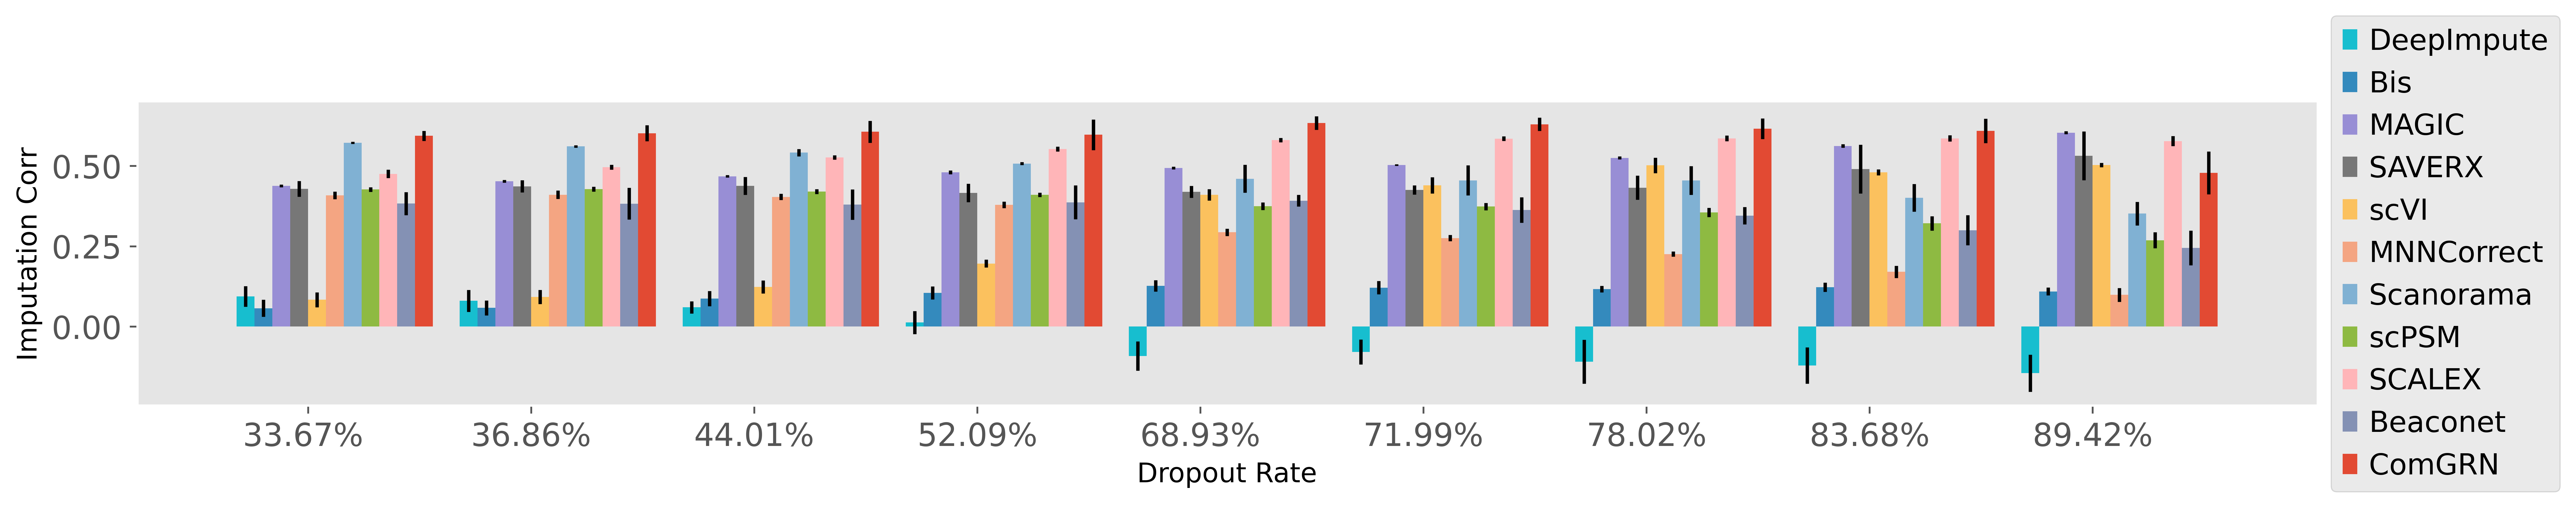

In [18]:
# 设置 Nature 配色方案
# colors = color_palette(name="Waterlilies",N=9)

# 绘制条形图
dropouts = df.index.to_series()

# Create a bar chart
fig, ax = plt.subplots(figsize=(16, 3))

# 绘制不同组的背景颜色
# for i in range(len(dropouts)):
#   plt.axvspan(i - 0.5, i + 0.5, color=colors_bg[i], alpha=0.5)


for i, label in enumerate(df.columns):
    # print(label)
    ax.bar([x + (i-3.5) * 0.08 for x in range(len(dropouts))], df[label], yerr=vf[label], width=0.08, label=label, color=colors[i])
    # ax.set_xticklabels(df.index, rotation=45, ha='right')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.set_xticks(range(len(dropouts)))
ax.set_xticklabels(dropouts)
ax.set_xlabel('Capture Rate')
# ax.set_title('Comparison of Different Methods')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Dropout Rate')
plt.ylabel('Imputation Corr')
plt.grid(False)
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
rank = [ranking[r].mean(1) for r in ranking]

In [20]:
rank

[DeepImpute    10.222222
 Bis            7.666667
 MAGIC          3.111111
 SAVERX         3.888889
 scVI           8.222222
 MNNCorrect     6.777778
 Scanorama      6.666667
 scPSM          9.666667
 SCALEX         4.111111
 Beaconet       4.222222
 ComGRN         1.444444
 dtype: float64,
 DeepImpute    10.666667
 Bis           10.111111
 MAGIC          3.222222
 SAVERX         4.888889
 scVI           6.777778
 MNNCorrect     8.333333
 Scanorama      3.777778
 scPSM          6.666667
 SCALEX         2.333333
 Beaconet       7.777778
 ComGRN         1.444444
 dtype: float64]

ValueError: x and y must have same first dimension, but have shapes (9,) and (12,)

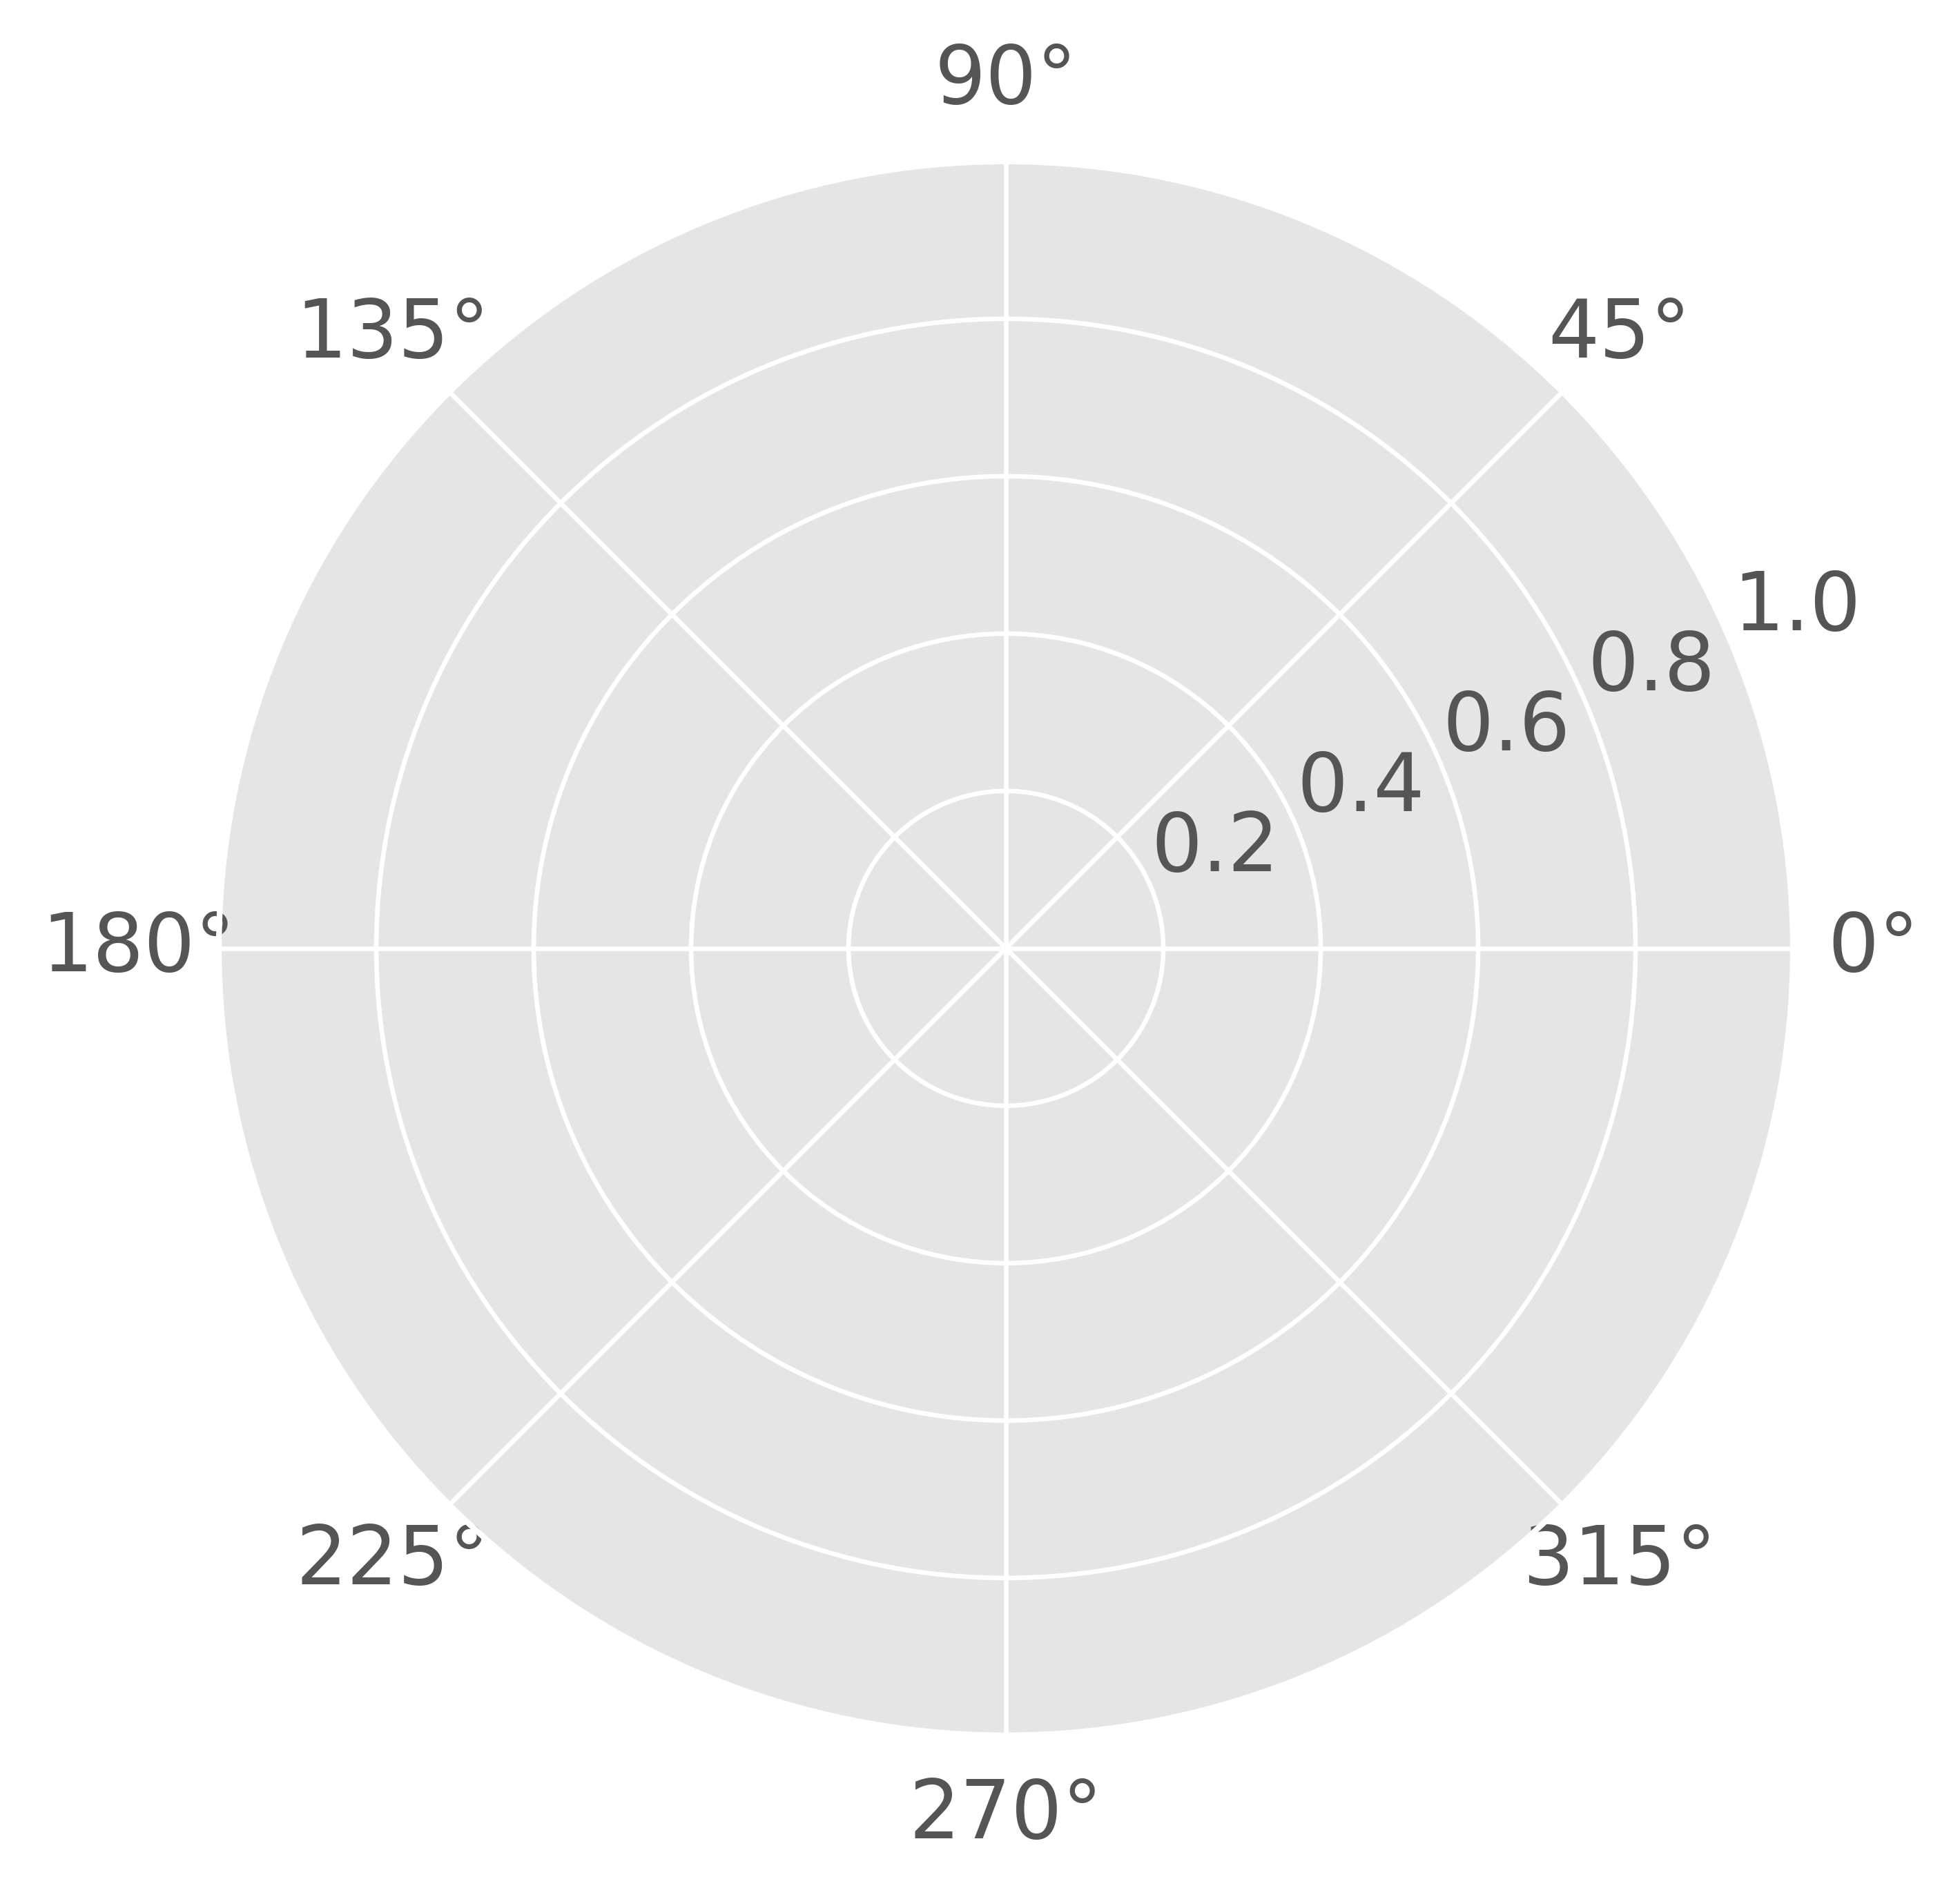

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
data = [r.to_list() for r in rank]

# 方法名称
methods = ['MAGIC', 'scVI', 'SAVERX', 'DeepImpute', 'Bis', 'scPSM', 'SCALEX', 'ComGRN']

# 角度和数值
angles = np.linspace(0, 2 * np.pi, len(methods), endpoint=False).tolist()
angles += angles[:1]

# 创建图形
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, polar=True)

# 绘制雷达图
labels = ['Cell Corr', 'Gene Corr', 'Imputation Corr']

values = data[0] + data[0][:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=labels[0])
ax.fill(angles, values, alpha=0.25)

values = data[1] + data[1][:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=labels[1])
ax.fill(angles, values, alpha=0.25)

values = data[2] + data[2][:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=labels[2])
ax.fill(angles, values, alpha=0.25)

# 添加标签
# 设置x轴刻度标签间隔
ax.tick_params(axis='x', which='major', pad=20) 
ax.set_xticks(np.linspace(0, 2*np.pi, len(methods), endpoint=False))
ax.set_xticklabels(methods)

# ax.set_yticklabels([1, 2, 3, 4, 5, 6, 7, 8])
ax.legend(loc='upper right', bbox_to_anchor=(1.45, 1.2))
plt.title("The ranking of different methods")
# 显示图形
plt.show()